<a href="https://colab.research.google.com/github/arpitv424/Poisonous-NonPoisonous-Snake-Classifier/blob/master/SnkCls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib. pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
train_path="/content/drive/My Drive/SnkCls/Train"
test_path="/content/drive/My Drive/SnkCls/Test"
valid_path="/content/drive/My Drive/SnkCls/valid"

In [13]:
train=ImageDataGenerator().flow_from_directory(train_path, target_size=(300,300), classes=['N-V','V'], batch_size=10)

Found 588 images belonging to 2 classes.


In [0]:
img, labels=next(train)

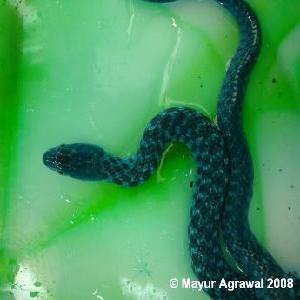

In [29]:
cv2_imshow(img[1])